In [1]:
import numpy as np
import gym
from gym import wrappers
import time
import matplotlib.pyplot as plt

In [2]:
def run_episode(env, policy, gamma, render = False):
    obs = env.reset()
    total_reward = 0
    step_idx = 0
    while True:
        if render:
            env.render()
        obs, reward, done , _ = env.step(int(policy[obs]))
        total_reward += (gamma ** step_idx * reward)
        step_idx += 1
        if done:
            break
    return total_reward


def evaluate_policy(env, policy, gamma,  n = 100):
    scores = [
            run_episode(env, policy, gamma = gamma, render = False)
            for _ in range(n)]
    return np.mean(scores)

def extract_policy(v, gamma):
    policy = np.zeros(env.nS)
    for s in range(env.nS):
        q_sa = np.zeros(env.action_space.n)
        for a in range(env.action_space.n):
            for next_sr in env.P[s][a]:
                p, s_, r, _ = next_sr
                q_sa[a] += (p * (r + gamma * v[s_]))
        policy[s] = np.argmax(q_sa)
    return policy


def value_iteration(env, gamma):
    v = np.zeros(env.nS)  
    max_iterations = 100000
    eps = 1e-20
    for i in range(max_iterations):
        prev_v = np.copy(v)
        for s in range(env.nS):
            q_sa = [sum([p*(r + gamma*prev_v[s_]) for p, s_, r, _ in env.P[s][a]]) for a in range(env.nA)] 
            v[s] = max(q_sa)
        #print(np.sum(np.fabs(prev_v - v)))
        if (np.sum(np.fabs(prev_v - v)) <= eps):
            k=i+1
            print ('Value-iteration converged at iteration# %d.' %(i+1))
            break
    return v,k

500
Value-iteration converged at iteration# 30.
[4. 4. 4. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 0. 0. 0. 3. 3. 3. 3.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 2. 2. 2. 2.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 2. 2. 2. 2. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 4. 4. 4. 4. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 5. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 2. 2. 2. 2. 0. 0. 0. 0. 2. 2. 2. 2.
 1. 2. 0. 2. 1. 1. 1. 1. 2. 2. 2. 2. 3. 3. 3. 3. 2. 2. 2. 2. 1. 2. 3. 2.
 3. 3. 3. 3. 1. 1. 1. 1. 3. 3. 3. 3. 2. 2. 2. 2. 3. 1. 3. 2. 3. 3. 3. 3.
 1. 1. 1. 1. 3. 3. 3. 3. 0. 0. 0. 0. 3. 1. 3. 0. 3. 3. 3. 3. 1. 1. 1. 1.
 3. 3. 3. 3. 0. 0. 0. 0. 3. 1. 3. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 1.

Value-iteration converged at iteration# 233.
[4. 4. 4. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 0. 0. 0. 3. 3. 3. 3.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 2. 2. 2. 2.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 2. 2. 2. 2. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 4. 4. 4. 4. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 5. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 2. 2. 2. 2. 0. 0. 0. 0. 2. 2. 2. 2.
 1. 2. 0. 2. 1. 1. 1. 1. 2. 2. 2. 2. 3. 3. 3. 3. 2. 2. 2. 2. 1. 2. 3. 2.
 3. 3. 3. 3. 1. 1. 1. 1. 3. 3. 3. 3. 2. 2. 2. 2. 3. 1. 3. 2. 3. 3. 3. 3.
 1. 1. 1. 1. 3. 3. 3. 3. 0. 0. 0. 0. 3. 1. 3. 0. 3. 3. 3. 3. 1. 1. 1. 1.
 3. 3. 3. 3. 0. 0. 0. 0. 3. 1. 3. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 1. 1.

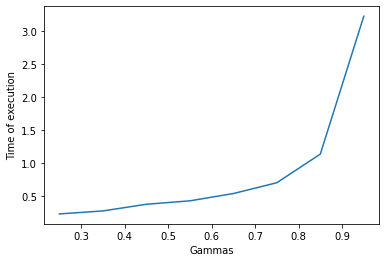

Policy average score =  1.7345285056667876


In [5]:
env_name  = 'Taxi-v3'
env = gym.make(env_name)
env = env.unwrapped
times=[0]*10
gammas=[0]*10
iterations=[0]*10
listscore=[0]*10
for i in range(2,10):
    start=time.time()
    optimal_v,k = value_iteration(env, gamma=(i+0.5)/10);
    policy = extract_policy(optimal_v, gamma=(i+0.5)/10)
    policy_score = evaluate_policy(env, policy, gamma=(i+0.5)/10, n=1000)
    end=time.time()
    gammas[i]=(i+0.5)/10
    iterations[i]=k
    times[i]=end-start
    print(policy)
plt.plot(gammas[2:], times[2:])
plt.xlabel('Gammas')
plt.ylabel('Time of execution')
plt.show()
print('Policy average score = ', policy_score)